$\newcommand{\ket}[1]{\left|{#1}\right\rangle}
\newcommand{\bra}[1]{\left\langle{#1}\right|}$
<body>
    <div>
        <tr><h1>
            <b><font face="Verdana">Exercise 6.8 ($T_3$):</font></b>
        </h1></tr>
        <p>
            Do the same for other entangled triplet states,
        </p>
        <p><center>
            $\ket{T_2}$ = ($\frac{1}{\sqrt{2}}$)( $\ket{uu}$ + $\ket{dd}$)<br>
            $\ket{T_3}$ = ($\frac{1}{\sqrt{2}}$)( $\ket{uu}$ - $\ket{dd}$)
        </center></p>
        <p>
            and interpret.
        </p>
    </div>
</body>

In [1]:
import numpy as np
from qiskit import *
from copy import *
from qiskit.visualization import plot_histogram, iplot_state_city
from qiskit.quantum_info import Pauli, state_fidelity, basis_state, process_fidelity
from math import *

In [2]:
## this function is used as a simple way to calculate the state vector of a circuit qc
def stater(qc):
    backend_sim = BasicAer.get_backend('statevector_simulator')
    result = execute(qc, backend_sim).result()
    state = result.get_statevector(qc)
    return state

First we must create a triplet state using a circuit of two qubits.

In [3]:
a = QuantumRegister(1, 'a')
b = QuantumRegister(1, 'b')
qc = QuantumCircuit(a,b)

The following code lists out the different gates used in the circuit to connect them in a triplet state.

The simulator represents the four values of a given state vector and so we can see how the matrix of values would change after each new gate is added.

Possibilities represents the classical bits that could result after each new gate is added.

In [4]:
print('Original:')
print(stater(qc))
# insert a h gate on qubit a
qc.h(a)
print(1)
print(stater(qc))
## simulator: (0.7)(0.7)00
# insert a cx gate from qubit a to qubit b
qc.cx(a,b)
print(2)
print(stater(qc))
## simulator: (0.7)00(0.7)
## at this point qubit a can be either 0 or 1
## and qubit b can be either 0 or 1 depending on qubit a
## possibilities: 00,11
# insert a z gate on qubit b
qc.z(b)
print('State Vector:')
## simulator: (0.7)00(-0.7)
## at this point qubit a can be either 1 or 0
## and qubit b can be either 1 or 0 in a negative superposition
## possibilities: 00,11
print(stater(qc))
tripState = stater(qc)

Original:
[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
1
[0.70710678+0.j 0.70710678+0.j 0.        +0.j 0.        +0.j]
2
[0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]
State Vector:
[ 0.70710678+0.j  0.        +0.j  0.        +0.j -0.70710678+0.j]


<p>In summary, this circuit is made up of two qubits. An h gate is used on the first qubit, qubit a.<br>
Then, a cx gate is used to connect qubit a to the second qubit, qubit b.<br>
Finally, a z gate is used on qubit b to give us our final state.</p>

In [5]:
iplot_state_city(tripState)

This diagram represents the density matrix of the state vector. You can see here that only the combinations of $\ket{00}$ and $\ket{11}$ have block representations rather than flat squares. However, unlike $T_2$ two of the blocks are found on the negative side of the graph.

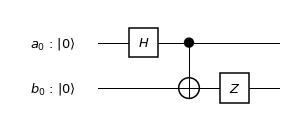

In [6]:
qc.draw(output='mpl')
# this is a maximally entangled system in a triplet state (T3)

[[ 0.707+0.j  0.707+0.j  0.   +0.j  0.   +0.j]
 [ 0.   +0.j  0.   +0.j  0.707+0.j -0.707+0.j]
 [ 0.   +0.j  0.   +0.j -0.707+0.j -0.707+0.j]
 [-0.707+0.j  0.707+0.j  0.   +0.j  0.   +0.j]]


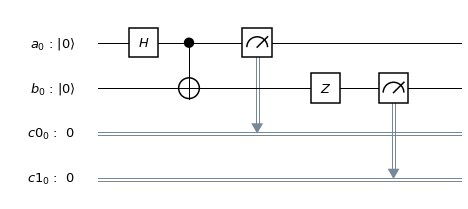

In [7]:
backend = Aer.get_backend('unitary_simulator')
job = execute(qc, backend)
result = job.result()
print(result.get_unitary(qc, decimals=3))
c0 = ClassicalRegister(1, 'c0')
c1 = ClassicalRegister(1, 'c1')
meas = QuantumCircuit(a,b,c0,c1)
meas.draw(output='mpl')
meas.measure(a,c0)
meas.measure(b,c1)
circ = qc+meas
circ.draw(output='mpl')

In [8]:
backend_sim = Aer.get_backend('qasm_simulator')
job_sim = execute(circ, backend_sim, shots=1024)
result_sim = job_sim.result()
counts = result_sim.get_counts(circ)
print(counts)
# there are always only two solutions: 11 and 00

{'0 0': 510, '1 1': 514}


As shown by the simulator and histogram, only $\ket{11}$ and $\ket{00}$ are possibilities for this circuit. This partially verifies that the circuit is in a triplet state.

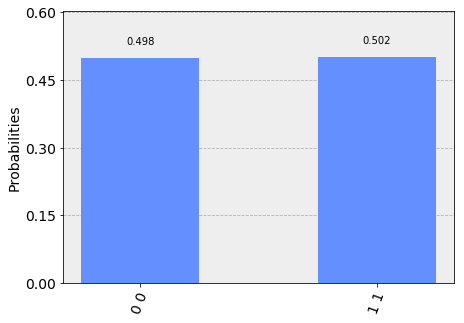

In [9]:
plot_histogram(counts)

<p>To find the expectation value of the operators, you can do it by hand or using qiskit:</p>
<p>Find the expectation value of $\sigma_z$$\tau_z$.</p>

<p><center>$\sigma_z$$\tau_z$$\ket{T_3}$ = $\sigma_z$$\tau_z$($\frac{1}{\sqrt{2}}$)( $\ket{uu}$ - $\ket{dd}$)<br>
           = $\tau_z$($\frac{1}{\sqrt{2}}$)( $\ket{uu}$ + $\ket{dd}$)<br>
           = ($\frac{1}{\sqrt{2}}$)( $\ket{uu}$ - $\ket{dd}$)
</center> </p>          
If we square the equation and multiply the complex conjugate by the original equation, it becomes:
<p><center>= $\frac{1}{2}$( $\ket{uu}$ - $\ket{dd}$)( $\ket{uu}$ - $\ket{dd}$)<br>
           = $\frac{1}{2}$(1+1)<br>
           = 1</center></p>
So the expectation value of $\sigma_z$$\tau_z$ is 1.

Qiskit can also model the expectation values using matrices.

First, three new circuits were created in order to change each component x,y, and z. Each circuit is made up of the original circuit qc plus either an x,y, or z gate for each respective component.

The state vector for this circuit is determined at the end of the function as a factor in the matrix multiplication. It is not stored as a value, but represents the complex conjugate of the state vector of our original state vector called original.

The expectation value can be calculated by taking the transpose of original and multiplying it by the state vector of x(and y,z)_circuit.

This will give you an expectation value of 1 for z and y as well as a value of -1 for x.

In [10]:
def expectationValue(qc):
    original = stater(qc)
    
    a = QuantumRegister(2)
    b = ClassicalRegister(2)
    
    # create a duplicate circuit flipped around the x axis (conjugate of the original)    
    x_circuit = deepcopy(qc)
    x_circuit.x(0)
    x_circuit.x(1)

    # create a duplicate circuit flipped around the y axis (conjugate of the original)
    y_circuit = deepcopy(qc)
    y_circuit.y(0)
    y_circuit.y(1) 
    
    # create a duplicate circuit flipped around the z axis (conjugate of the original)
    z_circuit = deepcopy(qc)
    z_circuit.z(0)
    z_circuit.z(1)
    
    
    print('Expectation Value X:', (np.transpose(original)@stater(x_circuit)).round(1))
    print('Expectation Value Y:', (np.transpose(original)@stater(y_circuit)).round(1))
    print('Expectation Value Z:', (np.transpose(original)@stater(z_circuit)).round(1))

In [11]:
expectationValue(qc)

Expectation Value X: (-1+0j)
Expectation Value Y: (1+0j)
Expectation Value Z: (1+0j)
